In [1]:
import tensorflow as tf

In [2]:
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.1.0


In [3]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd 
import os

# to make this notebook's output stable across runs
# 让笔记全程输入稳定
np.random.seed(42)

# To plot pretty figures
# 导入绘图工具
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
# 设定图片保存路径，这里写了一个函数，后面直接调用即可
PROJECT_ROOT_DIR = "F:\ML\Machine learning\Hands-on machine learning with scikit-learn and tensorflow"
CHAPTER_ID = "07_Ensemble Learning and Random Forests"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
# 忽略无用警告
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
(train_image, train_label),(test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 10s 2us/step


In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
train_label.shape

(60000,)

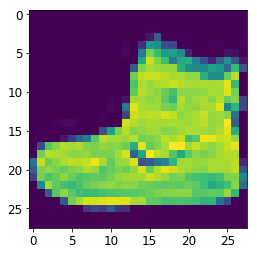

In [7]:
plt.imshow(train_image[0])

In [8]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train_image = train_image/255
test_image = test_image/255

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [12]:
model.fit(train_image, train_label, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.5028 - acc: 0.8232
Epoch 2/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3733 - acc: 0.8658
Epoch 3/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3377 - acc: 0.8766


In [13]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3836 - acc: 0.8623


[0.3836020139455795, 0.8623]

tf one-hot 调用

In [14]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [15]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)